In [57]:
from pathlib import Path
import cantera as ct
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
import numpy as np
import pandas as pd

Stoichiometric mixture, phi = 1

In [58]:
Air_flow_rate = 5130 # Kg/h
hydraulic_dia = 1.54 # m
Area_air_inlet = (np.pi/4)*hydraulic_dia*hydraulic_dia

fuel_flow_rate = 325 # Kg/h
dia_nozzle = 0.044  # m
Area_fuel_inlet = (np.pi/4)*dia_nozzle*dia_nozzle

air_temp = 1392 # K

fuel_mass_flow = fuel_flow_rate/(3600*Area_fuel_inlet)
air_mass_flow = Air_flow_rate/(3600*Area_air_inlet)

print(fuel_mass_flow)
print(air_mass_flow)

59.372539606136364
0.7650389404822089


In [59]:
P = 101375

a = 2
comp_o = 'O2:0.21, N2:0.79'  # air composition
comp_f = 'CH4:0.88, C2H6:0.05, N2:0.07'  # fuel composition
#comp_f = 'CH4:0.616, C2H6:0.035, N2:0.049, H2:0.3'  # fuel composition
#comp_f = 'CH4:0.528, C2H6:0.03, N2:0.042, H2:0.4'  # fuel composition   put , a = 2.3
#comp_f = 'CH4:0.9, C2H6:0.1' # fuel composition
#comp_f = 'CH4:0.352, C2H6:0.02, N2:0.028, H2:0.6'  # fuel composition   ut , a = 2.4
#comp_f = 'CH4:0.704, C2H6:0.04, N2:0.056, H2:0.2'  # fuel composition   put , a = 2.1
#comp_f = 'CH4:0.792, C2H6:0.045, N2:0.063, H2:0.1'  # fuel composition
#comp_f = 'CH4:0.44, C2H6:0.025, N2:0.035, H2:0.5'  # fuel composition
width = 0.2  # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and transport properties.
#gas = ct.Solution('Jerzembeck.yaml')
gas = ct.Solution('gri30.yaml')
gas.TP = gas.T, P

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
flame = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
flame.fuel_inlet.mdot = fuel_mass_flow/a  # assuming radial flow rate to be half of the axial flow rate
flame.fuel_inlet.X = comp_f
flame.fuel_inlet.T = 303

flame.oxidizer_inlet.mdot = air_mass_flow/2
flame.oxidizer_inlet.X = comp_o
flame.oxidizer_inlet.T = air_temp

# Set the boundary emissivities
flame.boundary_emissivities = 0.0, 0.0
# Turn radiation off
flame.radiation_enabled = False

flame.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
flame.solve(loglevel, auto=True)
flame.show()


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 6 point grid with energy equation re-enabled ***********

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

....

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.543e-05       5.01
Attempt Newton solution of steady-state problem...    success.

Problem solved on [75] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2CN H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH NH2 NH3 NO NO2 O O2 OH T velocity 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      4.774
Attemp

(0.19, 0.2)

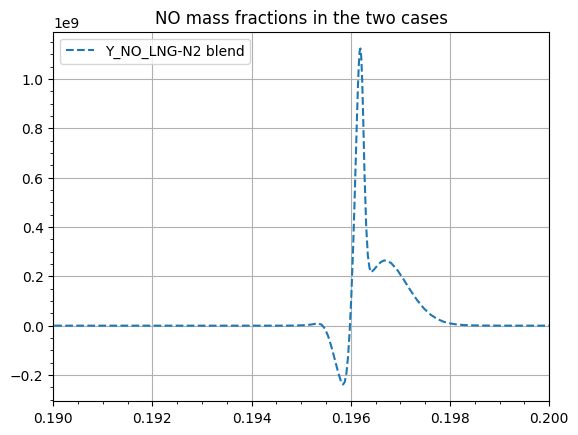

In [60]:

plt.plot(flame.grid, flame.heat_release_rate, label='Y_NO_LNG-N2 blend',linestyle = '--')
plt.minorticks_on()
plt.legend()
plt.grid(True)
plt.title('NO mass fractions in the two cases')
plt.legend()
plt.xlim([0.19, 0.2])

In [68]:
print(flame.heat_release_rate/1000000)
#Su0 = max(flame.heat_release_rate)
#Su0 = max(flame.heat_release_rate)
Su0 = flame.heat_release_rate[77]
print(f"Flame heat release rate is: {Su0/1000000:.2f} MW/m^3")

[-8.95165739e-11 -3.78086089e-16 -2.32574846e-18 -1.54122720e-18
 -9.28564887e-19 -4.58404186e-19 -1.03552363e-19  1.58321858e-19
  3.45496394e-19  4.72932887e-19  5.52876861e-19  5.95346231e-19
  6.08529779e-19  5.99112846e-19  5.72544039e-19  5.33254021e-19
  4.84835291e-19  4.30190120e-19  3.71652458e-19  3.11088523e-19
  2.49979877e-19  1.89492128e-19  1.30531785e-19  7.37933609e-20
  1.97984230e-20 -3.10719962e-20 -7.85504664e-20 -1.22460743e-19
 -1.62699060e-19 -1.99218452e-19 -2.32015528e-19 -2.61119173e-19
 -2.86580717e-19 -3.08372565e-19 -3.26950944e-19 -3.41797896e-19
 -3.53618971e-19 -3.61444626e-19 -3.66347390e-19 -3.67815371e-19
 -3.65495843e-19 -3.59226542e-19 -3.47920679e-19 -3.23047119e-19
  2.22162502e-19  4.29862890e-17  2.75594121e-15  5.05900465e-14
  9.69613605e-13  1.93671887e-11  3.31318616e-09  1.06741618e-07
  4.62458316e-06  3.71846304e-05  2.82649353e-04  1.61840620e-03
  6.67456225e-03  1.35397134e-02  2.62080408e-02  4.91260235e-02
  9.02280614e-02  1.63419

In [62]:
# Create a dataframe to store sensitivity-analysis data
sensitivities = pd.DataFrame(index=gas.reaction_equations(), columns=["base_case"])
# Set the value of the perturbation
dk = 1e-2

In [63]:
for m in range(gas.n_reactions):
    gas.set_multiplier(1.0)  # reset all multipliers
    gas.set_multiplier(1 + dk, m)  # perturb reaction m

    # Always force loglevel=0 for this
    # Make sure the grid is not refined, otherwise it won't strictly
    # be a small perturbation analysis
    # Turn auto-mode off since the flame has already been solved
    flame.solve(loglevel=0, refine_grid=False, auto=False)

    # The new flame speed
    #Su = max(flame.heat_release_rate)
    Su = flame.heat_release_rate[77]
    #Su = flame.velocity[0]
    #Su = flame.T[0]

    sensitivities.iloc[m, 0] = (Su - Su0) / (Su0 * dk)

# This step is essential, otherwise the mechanism will have been altered
gas.set_multiplier(1.0)

In [64]:
sensitivities.head()

,base_case
2 O + M <=> O2 + M,-0.001051
H + O + M <=> OH + M,-0.000115
H2 + O <=> H + OH,0.004406
HO2 + O <=> O2 + OH,-0.000714
H2O2 + O <=> HO2 + OH,-0.000542


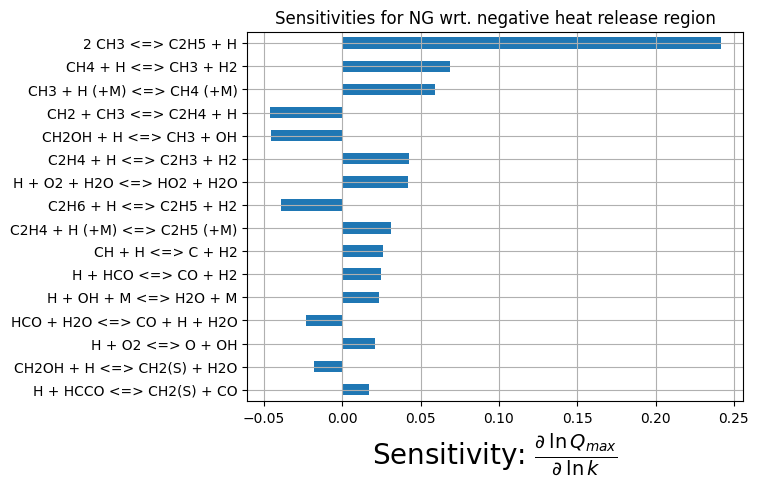

In [65]:
# Reaction mechanisms can contains thousands of elementary steps. Choose a threshold
# to see only the top few
threshold = 0.0169

# For plotting, collect only those steps that are above the threshold
# Otherwise, the y-axis gets crowded and illegible
sensitivities_subset = sensitivities[sensitivities["base_case"].abs() > threshold]
reactions_above_threshold = (
    sensitivities_subset.abs().sort_values(by="base_case", ascending=False).index
)
sensitivities_subset.loc[reactions_above_threshold].plot.barh(
    title="Sensitivities for NG wrt. negative heat release region", legend=None
)
plt.gca().invert_yaxis()
plt.grid(True)

plt.rcParams.update({"axes.labelsize": 20})
plt.xlabel(r"Sensitivity: $\frac{\partial\:\ln{Q_{max}}}{\partial\:\ln{k}}$");